In [15]:
# Install the required libraries
!pip install pytesseract
!apt install tesseract-ocr
!pip install opencv-python
!pip install spacy
!pip install pdfplumber

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 87.3 MB/s eta 0:00:00


In [38]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.2 MB/s eta 0:00:00


In [39]:
# Import the necessary libraries
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
import spacy
import pdfplumber
import PyPDF2

In [40]:
# Load the SpaCy English language model
nlp = spacy.load("en_core_web_sm")

In [41]:
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    # Perform NER on the extracted text
    doc = nlp(text)
    entities = {}
    for ent in doc.ents:
        entities[ent.label_] = entities.get(ent.label_, []) + [ent.text]

    # Print the detected entities
    print("Detected Entities:")
    for label, values in entities.items():
        print(f"{label}: {', '.join(values)}")

    # Print the extracted text
    print("\nExtracted Text from PDF:")
    print(text)

In [42]:
def process_file(file_path):
    # Get the file extension
    file_ext = file_path.split(".")[-1].lower()

    # Process based on file type
    if file_ext in ["jpg", "png", "jpeg"]:
        # Process image file
        ocr_ner(file_path)
    elif file_ext == "pdf":
        # Process PDF file
        extract_text_from_pdf(file_path)
    else:
        print("Unsupported file type.")


In [43]:
def ocr_ner(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform OCR on the grayscale image
    text = pytesseract.image_to_string(gray)

    # Perform NER on the extracted text
    doc = nlp(text)
    entities = {}
    for ent in doc.ents:
        entities[ent.label_] = entities.get(ent.label_, []) + [ent.text]

    # Print the detected entities
    print("Detected Entities:")
    for label, values in entities.items():
        print(f"{label}: {', '.join(values)}")

    # Print the extracted text
    print("\nExtracted Text:")
    print(text)

    # Display the image
    cv2_imshow(image)

Welcome to the OCR, NER, and Text Extraction Mini-Project!
Enter the path to your file: /content/test data.png
Detected Entities:
ORG: Apple, Apple, Macintosh, iPhone, Apple, Apple, Apple
DATE: 1976, 1984, 2007, Today
PERSON: Steve Jobs, Steve Wozniak, Ronald Wayne

Extracted Text:
Apple, the iconic tech giant, stands as a symbol of innovation, design, and technological prowess in the
modern world. Founded in 1976 by Steve Jobs, Steve Wozniak, and Ronald Wayne, Apple has
transformed the landscape of consumer electronics with its groundbreaking products and visionary
approach. From the revolutionary Macintosh computer in 1984 to the game-changing iPhone in 2007,
Apple has consistently pushed the boundaries of innovation, reshaping industries and redefining user
experiences. With its sleek designs, intuitive interfaces, and ecosystem of services, Apple has cultivated
a fiercely loyal customer base, spanning the globe. Today, Apple continues to lead the charge in areas
such as augmented r

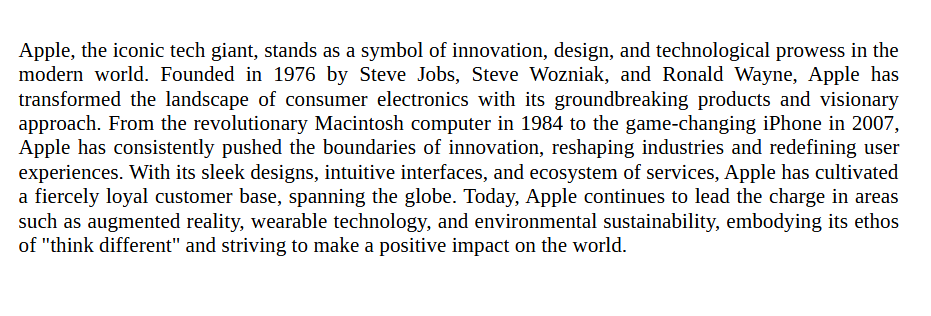

In [45]:
# User interface
print("Welcome to the OCR, NER, and Text Extraction Mini-Project!")
file_path = input("Enter the path to your file: ")
process_file(file_path)